10360


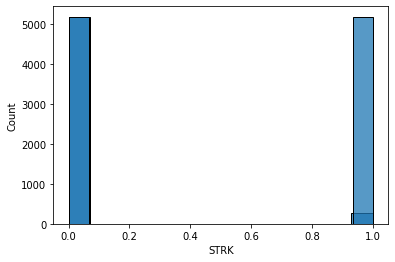

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC, NuSVC
from sklearn.metrics import f1_score, accuracy_score, make_scorer, roc_curve, classification_report
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, make_scorer
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix
import pickle

data=pd.read_csv('DIG.csv')
df=data.copy()
df = df.drop(['Unnamed: 0', 'ID'], axis=1)
df.head()

x = df.drop(['STRK'],axis=1)
y=df['STRK']

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,shuffle=True,random_state=30)

#see data if it is balanced 
#hint is not balanced 

#min max scaling 
# compute statistics on training fold for feature rescaling (min-max)
minima = np.min(xtrain, axis=0)
maxima = np.max(xtrain, axis=0)

# rescale train and test sets
xtrain = (xtrain - minima) / (maxima - minima)
xtest = (xtest - minima) / (maxima - minima)

ytrain.shape
columns1 = x.columns
df_resampling_x = pd.DataFrame(xtrain, columns = columns1)
#print(xtrain)
df_resampling_y = pd.DataFrame(ytrain, columns = ['id', 'STRK'])
del df_resampling_y['id']
concat = [df_resampling_x, df_resampling_y]
resampled_train_df = pd.concat(concat, axis=1)



ytrain.value_counts()
sn.histplot(ytrain)


from imblearn.over_sampling import SMOTE
X = resampled_train_df.drop(columns = 'STRK')
Y = resampled_train_df.STRK
smote = SMOTE()
xtrain ,ytrain = smote.fit_resample(X ,Y)

total = len(resampled_train_df['STRK'])

ytrain.value_counts()
sn.histplot(ytrain)
print(len(ytrain))

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix
from sklearn.metrics import fbeta_score, make_scorer

#w = [ {0:0.005,1:1.0},{0:1.0,1:1.0}, {0:1.0,1:2.0},{0:1.0,1:4.0}, {0:1.0,1:5}, {0:1.0,1:10}, {0:1.0,1:50}]
lr_w=LogisticRegression(max_iter=700000)
score_f1_beta = make_scorer(fbeta_score, beta=2)
grid_values_w = {'C':[100000]}
grid_lr_acc_w = GridSearchCV(lr_w, param_grid = grid_values_w, cv=5, verbose=10, n_jobs=-1, scoring = score_f1_beta)
grid_lr_acc_w.fit(xtrain, ytrain)
grid_lr_acc_w.best_params_
import pickle
filename = 'LOGSMOT.sav'
pickle.dump(grid_lr_acc_w, open(filename, 'wb'))
print(f'Best score: {grid_lr_acc_w.best_score_} with param: {grid_lr_acc_w.best_params_}')
#Predict values based on new parameters

print(f'Best score: {grid_lr_acc_w.best_score_} with param: {grid_lr_acc_w.best_params_}')
lrgpytest_w= grid_lr_acc_w.predict(xtest)
print(len(lrgpytest_w))
print('accuracy_score\n',accuracy_score(ytest,lrgpytest_w))
print('precision_score\n',precision_score(ytest,lrgpytest_w))
print('recall_score\n',recall_score(ytest,lrgpytest_w))
print('f1_score beta\n',fbeta_score(ytest,lrgpytest_w, beta=2.0))
grid_lr_acc_acc_sc=accuracy_score(ytest,lrgpytest_w)
grid_lr_acc_pr_sc=precision_score(ytest,lrgpytest_w)
grid_lr_acc_rec_sc=recall_score(ytest,lrgpytest_w)
grid_lr_acc_f1_sc=f1_score(ytest,lrgpytest_w)
confusion_matrix(ytest,lrgpytest_w)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best score: 0.9776737709933171 with param: {'C': 100000}
Best score: 0.9776737709933171 with param: {'C': 100000}
1360
accuracy_score
 0.9830882352941176
precision_score
 0.7714285714285715
recall_score
 0.8852459016393442
f1_score beta
 0.8598726114649681


array([[1283,   16],
       [   7,   54]])

In [3]:
from sklearn.svm import SVC
from sklearn.metrics import fbeta_score, make_scorer
#w = [ {0:1.0,1:1.0},{0:1.0,1:2.0},{0:1.0,1:4.0},{0:1.0,1:5}]
lsvc_params1  = {
    "kernel": ['rbf'],
    "C" : [10],
    'degree': [2,]
}
score_f1_beta = make_scorer(fbeta_score, beta=2)
lsvc1 =SVC()
lsvc_tune1 = GridSearchCV(estimator = lsvc1, param_grid = lsvc_params1, verbose=10, scoring = score_f1_beta, cv = 5, return_train_score = True)
lsvc_tune1.fit(xtrain, ytrain)
lsvc_tune1.best_params_
import pickle
filename = 'SVCSMOTE.sav'
pickle.dump(lsvc_tune1, open(filename, 'wb'))
print(f'Best score: {lsvc_tune1.best_score_} with param: {lsvc_tune1.best_params_}')

svc_pred= lsvc_tune1.predict(xtest)
print(len(lrgpytest_w))
print('accuracy_score\n',accuracy_score(ytest,svc_pred))
print('precision_score\n',precision_score(ytest,svc_pred))
print('recall_score\n',recall_score(ytest,svc_pred))
print('f1_score beta\n',fbeta_score(ytest,svc_pred, beta=2.0))
grid_lr_acc_acc_sc=accuracy_score(ytest,svc_pred)
grid_lr_acc_pr_sc=precision_score(ytest,svc_pred)
grid_lr_acc_rec_sc=recall_score(ytest,svc_pred)
grid_lr_acc_f1_sc=f1_score(ytest,svc_pred)
confusion_matrix(ytest,svc_pred)
#Predict values based on new parameters

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START C=10, degree=2, kernel=rbf..................................
[CV 1/5; 1/1] END ................C=10, degree=2, kernel=rbf; total time=   1.0s
[CV 2/5; 1/1] START C=10, degree=2, kernel=rbf..................................
[CV 2/5; 1/1] END ................C=10, degree=2, kernel=rbf; total time=   1.0s
[CV 3/5; 1/1] START C=10, degree=2, kernel=rbf..................................
[CV 3/5; 1/1] END ................C=10, degree=2, kernel=rbf; total time=   1.0s
[CV 4/5; 1/1] START C=10, degree=2, kernel=rbf..................................
[CV 4/5; 1/1] END ................C=10, degree=2, kernel=rbf; total time=   1.0s
[CV 5/5; 1/1] START C=10, degree=2, kernel=rbf..................................
[CV 5/5; 1/1] END ................C=10, degree=2, kernel=rbf; total time=   1.0s
Best score: 0.9996141081902692 with param: {'C': 10, 'degree': 2, 'kernel': 'rbf'}
1360
accuracy_score
 0.9801470588235294
precisio

array([[1294,    5],
       [  22,   39]])

In [4]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

ada_1 = AdaBoostClassifier()
ada_1_params  = {
     "n_estimators":[ 1000],
    "learning_rate" : [ .1]
}
score_f1_beta = make_scorer(fbeta_score, beta=2)
ada_1_tune = GridSearchCV(estimator = ada_1, param_grid = ada_1_params, scoring = score_f1_beta, cv = 5, return_train_score = True, verbose = 10)
ada_1_tune.fit(xtrain, ytrain)
ada_1_tune.best_params_
import pickle
filename = 'ADASMOTE.sav'
pickle.dump(ada_1_tune, open(filename, 'wb'))
print(f'Best score: {ada_1_tune.best_score_} with param: {ada_1_tune.best_params_}')
#Predict values based on new parameters
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix
ada_1_preds = ada_1_tune.predict(xtest)
print('accuracy_score\n',accuracy_score(ytest,ada_1_preds))
print('precision_score\n',precision_score(ytest,ada_1_preds))
print('recall_score\n',recall_score(ytest,ada_1_preds))
print('f1_score beta\n',fbeta_score(ytest,ada_1_preds, beta=2.0))
grid_lr_acc_acc_sc=accuracy_score(ytest,ada_1_preds)
grid_lr_acc_pr_sc=precision_score(ytest,ada_1_preds)
grid_lr_acc_rec_sc=recall_score(ytest,ada_1_preds)
grid_lr_acc_f1_sc=f1_score(ytest,ada_1_preds)
confusion_matrix(ytest,ada_1_preds)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START learning_rate=0.1, n_estimators=1000........................
[CV 1/5; 1/1] END ......learning_rate=0.1, n_estimators=1000; total time=  34.4s
[CV 2/5; 1/1] START learning_rate=0.1, n_estimators=1000........................
[CV 2/5; 1/1] END ......learning_rate=0.1, n_estimators=1000; total time=  33.6s
[CV 3/5; 1/1] START learning_rate=0.1, n_estimators=1000........................
[CV 3/5; 1/1] END ......learning_rate=0.1, n_estimators=1000; total time=  33.6s
[CV 4/5; 1/1] START learning_rate=0.1, n_estimators=1000........................
[CV 4/5; 1/1] END ......learning_rate=0.1, n_estimators=1000; total time=  33.6s
[CV 5/5; 1/1] START learning_rate=0.1, n_estimators=1000........................
[CV 5/5; 1/1] END ......learning_rate=0.1, n_estimators=1000; total time=  33.6s
Best score: 0.9768385541433539 with param: {'learning_rate': 0.1, 'n_estimators': 1000}
accuracy_score
 0.975
precision_score
 0.72

array([[1283,   16],
       [  18,   43]])

In [6]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
rfc_1 = RandomForestClassifier()
rfc_1_params  = {
    "n_estimators":[ 1000],
    "criterion" : ['gini'],
}
score_f1_beta = make_scorer(fbeta_score, beta=2)
rfc_1_tune = GridSearchCV(estimator = rfc_1, param_grid = rfc_1_params, cv = 5, scoring=score_f1_beta, return_train_score = True, verbose = 10)
rfc_1_tune.fit(xtrain, ytrain)
rfc_1_tune.best_params_
filename = 'RFCSMOTE.sav'
pickle.dump(rfc_1_tune, open(filename, 'wb'))
rfc_1_preds = rfc_1_tune.predict(xtest)
print('accuracy_score\n',accuracy_score(ytest,rfc_1_preds))
print('precision_score\n',precision_score(ytest,rfc_1_preds))
print('recall_score\n',recall_score(ytest,rfc_1_preds))
print('f1_score beta\n',fbeta_score(ytest,rfc_1_preds, beta=2.0))
grid_lr_acc_acc_sc=accuracy_score(ytest,rfc_1_preds)
grid_lr_acc_pr_sc=precision_score(ytest,rfc_1_preds)
grid_lr_acc_rec_sc=recall_score(ytest,rfc_1_preds)
grid_lr_acc_f1_sc=f1_score(ytest,rfc_1_preds)
confusion_matrix(ytest,rfc_1_preds)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START criterion=gini, n_estimators=1000...........................
[CV 1/5; 1/1] END .........criterion=gini, n_estimators=1000; total time=  24.4s
[CV 2/5; 1/1] START criterion=gini, n_estimators=1000...........................
[CV 2/5; 1/1] END .........criterion=gini, n_estimators=1000; total time=  24.2s
[CV 3/5; 1/1] START criterion=gini, n_estimators=1000...........................
[CV 3/5; 1/1] END .........criterion=gini, n_estimators=1000; total time=  23.7s
[CV 4/5; 1/1] START criterion=gini, n_estimators=1000...........................
[CV 4/5; 1/1] END .........criterion=gini, n_estimators=1000; total time=  23.8s
[CV 5/5; 1/1] START criterion=gini, n_estimators=1000...........................
[CV 5/5; 1/1] END .........criterion=gini, n_estimators=1000; total time=  23.7s
accuracy_score
 0.9742647058823529
precision_score
 1.0
recall_score
 0.4262295081967213
f1_score beta
 0.4814814814814814


array([[1299,    0],
       [  35,   26]])

In [9]:

from sklearn.neural_network import MLPClassifier
score_f1_beta = make_scorer(fbeta_score, beta=2)
parameter_space = {
    'activation': ['relu'],
    'solver': [ 'adam'],
    'alpha': [.00001],
    'learning_rate': ['adaptive'],
}
score_f1_beta = make_scorer(fbeta_score, beta=2)
mlp_gs = MLPClassifier(max_iter=10000)
clf = GridSearchCV(mlp_gs, parameter_space, cv=5, scoring=score_f1_beta, verbose=10)
clf.fit(xtrain, ytrain)
clf.best_params_
import pickle
filename = 'MLPSMOTE.sav'
pickle.dump(clf, open(filename, 'wb'))
clf_preds = clf.predict(xtest)
print('accuracy_score\n',accuracy_score(ytest,clf_preds))
print('precision_score\n',precision_score(ytest,clf_preds))
print('recall_score\n',recall_score(ytest,clf_preds))
print('f1_score beta\n',fbeta_score(ytest,clf_preds, beta=2.0))
grid_lr_acc_acc_sc=accuracy_score(ytest,clf_preds)
grid_lr_acc_pr_sc=precision_score(ytest,clf_preds)
grid_lr_acc_rec_sc=recall_score(ytest,clf_preds)
grid_lr_acc_f1_sc=f1_score(ytest,clf_preds)
confusion_matrix(ytest,clf_preds)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START activation=relu, alpha=1e-05, learning_rate=adaptive, solver=adam
[CV 1/5; 1/1] END activation=relu, alpha=1e-05, learning_rate=adaptive, solver=adam; total time=   8.4s
[CV 2/5; 1/1] START activation=relu, alpha=1e-05, learning_rate=adaptive, solver=adam
[CV 2/5; 1/1] END activation=relu, alpha=1e-05, learning_rate=adaptive, solver=adam; total time=   9.2s
[CV 3/5; 1/1] START activation=relu, alpha=1e-05, learning_rate=adaptive, solver=adam
[CV 3/5; 1/1] END activation=relu, alpha=1e-05, learning_rate=adaptive, solver=adam; total time=   8.6s
[CV 4/5; 1/1] START activation=relu, alpha=1e-05, learning_rate=adaptive, solver=adam
[CV 4/5; 1/1] END activation=relu, alpha=1e-05, learning_rate=adaptive, solver=adam; total time=   8.2s
[CV 5/5; 1/1] START activation=relu, alpha=1e-05, learning_rate=adaptive, solver=adam
[CV 5/5; 1/1] END activation=relu, alpha=1e-05, learning_rate=adaptive, solver=adam; total time

array([[1293,    6],
       [  16,   45]])

In [10]:
from sklearn.metrics import roc_auc_score
print("AUC_ROC log: ", roc_auc_score(ytest, lrgpytest_w))
print("AUC_ROC ada: ", roc_auc_score(ytest, ada_1_preds))
print("AUC_ROC svc: ", roc_auc_score(ytest, svc_pred))
print("AUC_ROC rfc: ", roc_auc_score(ytest, rfc_1_preds))
print("AUC_ROC mlp: ", roc_auc_score(ytest,clf_preds))

AUC_ROC log:  0.9364643672938832
AUC_ROC ada:  0.8463004328676536
AUC_ROC svc:  0.8177475737957319
AUC_ROC rfc:  0.7131147540983607
AUC_ROC mlp:  0.8665429901942225
